#### Import Libraries

In [55]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


#### Load Dataset and Inspect Basic Info

In [56]:
df = pd.read_csv("../data/Nova_pay_cleaned_dataset.csv")

In [57]:
print("Dataset Shape:", df.shape)

Dataset Shape: (11140, 27)


In [58]:
display(df.head())

,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud,ip_country_missing
0,dcd64b56-3092-4778-a0ce-207d76b282d9,0006f893-10a8-4235-831b-fcae1e3f0140,2023-12-24 15:43:45.573611+00:00,CA,CAD,PHP,web,729.85,540.09,12.06,...,standard,17,0.182,0,0.566,6,9,0.00,1,False
1,9ddaf713-8129-44bb-9873-11b1bd5a9228,00147b79-11ed-4f8f-a3af-651778b78dd3,2024-04-12 02:12:31.573611+00:00,US,USD,MXN,web,286.04,286.04,5.88,...,low,46,0.169,0,0.852,5,6,0.20,1,False
2,77c581e1-7e9c-4a5b-bd6a-6649e927d8ca,00668d83-6f9f-4401-9a0f-04f94140abb6,2025-10-15 14:02:56.573611+00:00,US,USD,USD,mobile,99.21,99.21,2.44,...,enhanced,1095,0.947,0,0.265,0,1,0.00,0,False
3,fee6f817-6d89-4d70-b634-f088214ff99a,00957a15-945f-4bfb-b5fc-d867cbaee95d,2024-07-14 22:19:08.573611+00:00,UK,GBP,NGN,mobile,2184.73,2730.91,34.15,...,low,36,0.369,0,0.488,7,10,0.22,1,False
4,a74a6887-3935-42b1-a67a-7e5f61b21087,00ab675d-a6ea-4d6e-bcdf-79027ce4f944,2024-07-13 09:52:36.573611+00:00,US,USD,PHP,mobile,146.36,146.36,4.07,...,standard,90,0.761,0,0.133,0,2,0.00,0,False


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11140 entries, 0 to 11139
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             11140 non-null  object 
 1   customer_id                11140 non-null  object 
 2   timestamp                  11140 non-null  object 
 3   home_country               11140 non-null  object 
 4   source_currency            11140 non-null  object 
 5   dest_currency              11140 non-null  object 
 6   channel                    11140 non-null  object 
 7   amount_src                 11140 non-null  float64
 8   amount_usd                 11140 non-null  float64
 9   fee                        11140 non-null  float64
 10  exchange_rate_src_to_dest  11140 non-null  float64
 11  device_id                  11140 non-null  object 
 12  new_device                 11140 non-null  bool   
 13  ip_address                 11140 non-null  obj

In [60]:
df.isnull().sum()

transaction_id               0
customer_id                  0
timestamp                    0
home_country                 0
source_currency              0
dest_currency                0
channel                      0
amount_src                   0
amount_usd                   0
fee                          0
exchange_rate_src_to_dest    0
device_id                    0
new_device                   0
ip_address                   0
ip_country                   0
location_mismatch            0
ip_risk_score                0
kyc_tier                     0
account_age_days             0
device_trust_score           0
chargeback_history_count     0
risk_score_internal          0
txn_velocity_1h              0
txn_velocity_24h             0
corridor_risk                0
is_fraud                     0
ip_country_missing           0
dtype: int64

#### Drop Irrelevant or Leaky Columns

In [61]:
# Drop irrelevant columns 
columns_to_drop = ['transaction_id', 'customer_id', 'device_id', 'ip_address' ]
df = df.drop(columns=columns_to_drop)

# Confirm columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['timestamp', 'home_country', 'source_currency', 'dest_currency', 'channel', 'amount_src', 'amount_usd', 'fee', 'exchange_rate_src_to_dest', 'new_device', 'ip_country', 'location_mismatch', 'ip_risk_score', 'kyc_tier', 'account_age_days', 'device_trust_score', 'chargeback_history_count', 'risk_score_internal', 'txn_velocity_1h', 'txn_velocity_24h', 'corridor_risk', 'is_fraud', 'ip_country_missing']


#### Check and Handle Missing Values

In [62]:
# Check for missing values
missing = df_encoded.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Display missing value summary
if missing.empty:
    print("✅ No missing values found.")
else:
    print("⚠️ Columns with missing values:\n", missing)

    # Example strategy: fill numeric with median (safer for skewed data)
    num_cols_with_missing = missing.index[df_encoded[missing.index].dtypes != 'object']
    df_encoded[num_cols_with_missing] = df_encoded[num_cols_with_missing].fillna(df_encoded[num_cols_with_missing].median())

    print("Missing values filled with median for:", list(num_cols_with_missing))

✅ No missing values found.


#### Time-Based Train, Validation, and Test Split

Data will be sorted by timestamp and split into:
70% Train
15% Validation
15% Test

In [63]:
# Sort by time
df = df.sort_values("timestamp").reset_index(drop=True)

In [64]:
# Define split ratios
train_size = 0.70
val_size = 0.15

n = len(df)
train_end = int(n * train_size)
val_end = int(n * (train_size + val_size))

# Split
train_df = df.iloc[:train_end]
val_df   = df.iloc[train_end:val_end]
test_df  = df.iloc[val_end:]

#### Checking Fraud distribution

In [65]:
# Check fraud distribution
for name, d in zip(
    ["Train", "Validation", "Test"],
    [train_df, val_df, test_df]
):
    print(f"{name} size: {len(d)} | Fraud rate: {d['is_fraud'].mean()*100:.2f}%")

Train size: 7797 | Fraud rate: 7.03%
Validation size: 1672 | Fraud rate: 11.42%
Test size: 1671 | Fraud rate: 15.20%


#### Drop Timestamp After Split

In [66]:
# Drop timestamp AFTER splitting
train_df = train_df.drop(columns=["timestamp"])
val_df   = val_df.drop(columns=["timestamp"])
test_df  = test_df.drop(columns=["timestamp"])

#### Separate Features and Target

In [67]:
X_train = train_df.drop(columns=["is_fraud"])
y_train = train_df["is_fraud"]

X_val = val_df.drop(columns=["is_fraud"])
y_val = val_df["is_fraud"]

X_test = test_df.drop(columns=["is_fraud"])
y_test = test_df["is_fraud"]

print("Shapes:")
print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Shapes:
Train: (7797, 21)
Val: (1672, 21)
Test: (1671, 21)


#### One-Hot Encode Categorical Columns

In [69]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", categorical_cols)

# Set up encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit on train, transform all
X_train_cat = pd.DataFrame(ohe.fit_transform(X_train[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols), index=X_train.index)
X_val_cat   = pd.DataFrame(ohe.transform(X_val[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols), index=X_val.index)
X_test_cat  = pd.DataFrame(ohe.transform(X_test[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols), index=X_test.index)

Categorical columns: ['home_country', 'source_currency', 'dest_currency', 'channel', 'ip_country', 'kyc_tier']


#### Scale Numerical Columns

In [70]:
from sklearn.preprocessing import StandardScaler

# Get numerical columns by excluding categorical ones
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Initialize scaler
scaler = StandardScaler()

# Fit on train, transform all sets
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), 
                           columns=numerical_cols, index=X_train.index)

X_val_num = pd.DataFrame(scaler.transform(X_val[numerical_cols]), 
                         columns=numerical_cols, index=X_val.index)

X_test_num = pd.DataFrame(scaler.transform(X_test[numerical_cols]), 
                          columns=numerical_cols, index=X_test.index)

#### Combine Encoded Categorical + Scaled Numeric

In [71]:
# Concatenate scaled numeric and one-hot encoded categorical
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_val_final = pd.concat([X_val_num, X_val_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

# Confirm final shapes
print("Final Train shape:", X_train_final.shape)
print("Final Val shape:", X_val_final.shape)
print("Final Test shape:", X_test_final.shape)

Final Train shape: (7797, 43)
Final Val shape: (1672, 43)
Final Test shape: (1671, 43)


#### Model Training

#### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize and train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_final, y_train)

# Predict
y_val_pred_lr = log_reg.predict(X_val_final)
y_val_proba_lr = log_reg.predict_proba(X_val_final)[:, 1]

# Evaluation
print("📊 Logistic Regression - Classification Report:")
print(classification_report(y_val, y_val_pred_lr, digits=3))

📊 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0      0.987     0.945     0.965      1481
           1      0.678     0.906     0.776       191

    accuracy                          0.940      1672
   macro avg      0.833     0.925     0.871      1672
weighted avg      0.952     0.940     0.944      1672



In [73]:
print("📉 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lr))

📉 Confusion Matrix:
[[1399   82]
 [  18  173]]


In [74]:
roc_auc_lr = roc_auc_score(y_val, y_val_proba_lr)
print(f"🎯 ROC AUC Score: {roc_auc_lr:.3f}")

🎯 ROC AUC Score: 0.965


#### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Initialize with class weight to handle imbalance
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_final, y_train)

# Predict
y_val_pred_dt = dt_model.predict(X_val_final)
y_val_proba_dt = dt_model.predict_proba(X_val_final)[:, 1]

# Evaluation
print("📊 Decision Tree - Classification Report:")
print(classification_report(y_val, y_val_pred_dt, digits=3))

📊 Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0      0.984     0.976     0.980      1481
           1      0.824     0.880     0.851       191

    accuracy                          0.965      1672
   macro avg      0.904     0.928     0.915      1672
weighted avg      0.966     0.965     0.965      1672



In [76]:
print("📉 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_dt))

📉 Confusion Matrix:
[[1445   36]
 [  23  168]]


In [77]:
roc_auc_dt = roc_auc_score(y_val, y_val_proba_dt)
print(f"🎯 ROC AUC Score: {roc_auc_dt:.3f}")

🎯 ROC AUC Score: 0.928


#### Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Train model with class weights
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train)

# Predictions
y_val_pred_rf = rf_model.predict(X_val_final)
y_val_proba_rf = rf_model.predict_proba(X_val_final)[:, 1]

# Evaluation
print("🌳 Random Forest - Classification Report:")
print(classification_report(y_val, y_val_pred_rf, digits=3))

🌳 Random Forest - Classification Report:
              precision    recall  f1-score   support

           0      0.983     0.999     0.991      1481
           1      0.994     0.864     0.924       191

    accuracy                          0.984      1672
   macro avg      0.988     0.932     0.958      1672
weighted avg      0.984     0.984     0.983      1672



In [79]:
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))

🧾 Confusion Matrix:
[[1480    1]
 [  26  165]]


In [80]:
roc_auc_rf = roc_auc_score(y_val, y_val_proba_rf)
print(f"🚀 ROC AUC Score: {roc_auc_rf:.3f}")

🚀 ROC AUC Score: 0.962


#### Observations
##### Random Forest gives very high precision (few false positives), excellent f1-score, and nearly perfect accuracy.
##### However, its recall (0.864) is slightly lower than Logistic Regression (0.906). In fraud detection, recall is critical to minimize missed fraud cases.

#### XGBoost Classifier

In [81]:
pip install xgboost

In [82]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_final, y_train)

# Predict
y_val_pred_xgb = xgb_model.predict(X_val_final)
y_val_proba_xgb = xgb_model.predict_proba(X_val_final)[:, 1]

# Evaluate
print("⚡ XGBoost - Classification Report:")
print(classification_report(y_val, y_val_pred_xgb, digits=3))

⚡ XGBoost - Classification Report:
              precision    recall  f1-score   support

           0      0.983     0.993     0.988      1481
           1      0.938     0.869     0.902       191

    accuracy                          0.978      1672
   macro avg      0.961     0.931     0.945      1672
weighted avg      0.978     0.978     0.978      1672



In [83]:
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_xgb))

🧾 Confusion Matrix:
[[1470   11]
 [  25  166]]


In [84]:
roc_auc_xgb = roc_auc_score(y_val, y_val_proba_xgb)
print(f"📊 ROC AUC Score: {roc_auc_xgb:.3f}")

📊 ROC AUC Score: 0.958


#### Observations:
##### XGBoost strikes a strong balance between precision and recall.
##### Random Forest has highest F1, but lower recall than XGBoost.
##### Logistic Regression has best recall (0.906), but lowest precision (0.678).
##### XGBoost has the highest precision after RF, with high f1 and ROC AUC, making it a top contender.

#### LightGBM Classifier

In [86]:
pip install lightgbm

In [87]:
from lightgbm import LGBMClassifier

# Train LightGBM
lgb_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train_final, y_train)

# Predict
y_val_pred_lgb = lgb_model.predict(X_val_final)
y_val_proba_lgb = lgb_model.predict_proba(X_val_final)[:, 1]

# Evaluate
print("🌿 LightGBM - Classification Report:")
print(classification_report(y_val, y_val_pred_lgb, digits=3))

[LightGBM] [Info] Number of positive: 548, number of negative: 7249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1845
[LightGBM] [Info] Number of data points in the train set: 7797, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
🌿 LightGBM - Classification Report:
              precision    recall  f1-score   support

           0      0.984     0.989     0.987      1481
           1      0.913     0.874     0.893       191

    accuracy                          0.976      1672
   macro avg      0.948     0.932     0.940      1672
weighted avg      0.976     0.976     0.976      1672



In [88]:
print("📄 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lgb))

📄 Confusion Matrix:
[[1465   16]
 [  24  167]]


In [89]:
roc_auc_lgb = roc_auc_score(y_val, y_val_proba_lgb)
print(f"📊 ROC AUC Score: {roc_auc_lgb:.3f}")

📊 ROC AUC Score: 0.952


#### ROC Curve Comparison

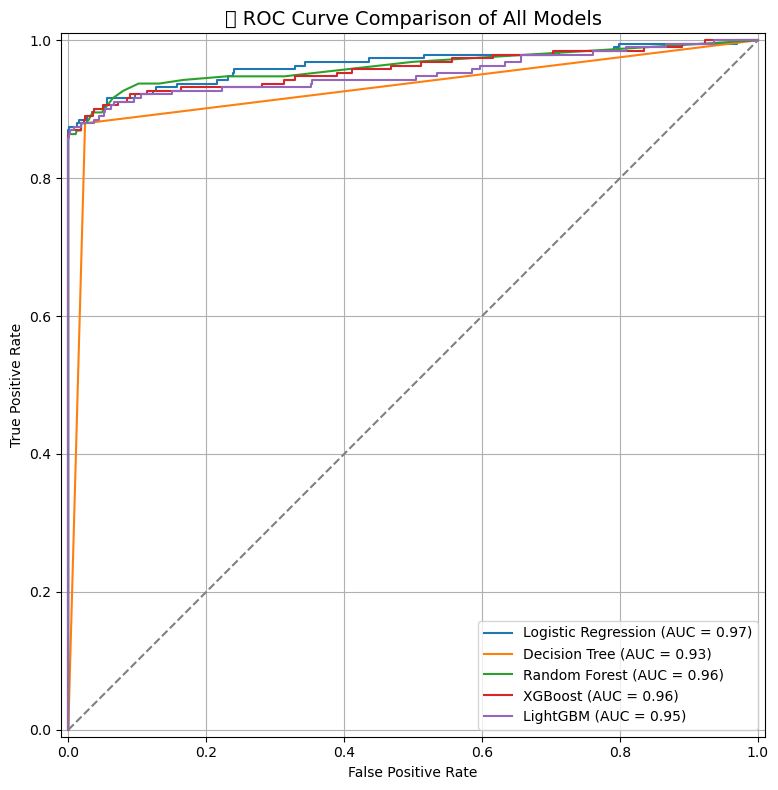

In [90]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 8))

# ROC Curves
RocCurveDisplay.from_predictions(y_val, y_val_proba_lr, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_predictions(y_val, y_val_proba_dt, name="Decision Tree", ax=plt.gca())
RocCurveDisplay.from_predictions(y_val, y_val_proba_rf, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_predictions(y_val, y_val_proba_xgb, name="XGBoost", ax=plt.gca())
RocCurveDisplay.from_predictions(y_val, y_val_proba_lgb, name="LightGBM", ax=plt.gca())

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("📈 ROC Curve Comparison of All Models", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 Model Comparison Summary

The table below compares the performance of five models on the validation set, focusing on **fraud detection** metrics. Since fraud detection often prioritizes **recall** (catching frauds) and **precision** (reducing false alarms), these are the key metrics we analyze.

| Model            | Precision (Fraud) | Recall (Fraud) | F1 Score (Fraud) | ROC AUC | False Negatives (FN) | False Positives (FP) |
|------------------|-------------------|----------------|------------------|---------|-----------------------|-----------------------|
| Logistic Regression | 0.678           | **0.906** ✅   | 0.776            | **0.965** ✅ | 18                    | 82                    |
| Decision Tree     | 0.824             | 0.880          | 0.851            | 0.928   | 23                    | 36                    |
| Random Forest     | **0.994** ✅     | 0.864          | **0.924** ✅     | 0.962   | 26                    | **1** ✅              |
| XGBoost           | 0.938             | 0.869          | 0.902            | 0.958   | 25                    | 11                    |
| LightGBM          | 0.913             | 0.874          | 0.893            | 0.952   | 24                    | 16                    |

---

## 🧠 Interpretation

- **Best Recall (0.906)**: Logistic Regression detects the most frauds but has high false positives.
- **Best Precision (0.994)**: Random Forest makes the fewest false alerts, ideal when false positives are costly.
- **Best F1 Score (0.924)**: Random Forest balances precision and recall the best.
- **Best ROC AUC (0.965)**: Logistic Regression has the highest overall ability to separate fraud from non-fraud.

---

## ✅ Recommended Model

**🔒 Random Forest** is currently the most balanced and effective model:
- Extremely **high precision** (fewer false fraud alerts),
- Good **recall** (catches most frauds),
- **Highest F1 score**,
- **Very low false positives**, which is critical in fraud detection to reduce investigation costs.

---


#### Feature Importance from LightGBM

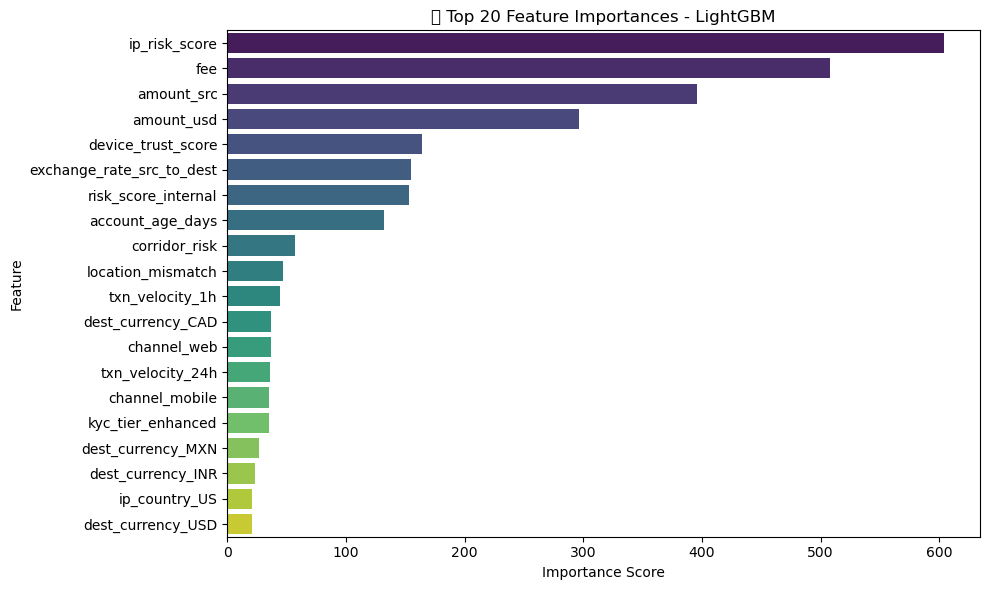

In [91]:
# Get feature importances from the trained LGBM model
feature_importance = pd.Series(lgb_model.feature_importances_, index=X_train_final.columns)

# Sort by importance
top_features = feature_importance.sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features[:20], y=top_features.index[:20], palette="viridis")
plt.title("🌟 Top 20 Feature Importances - LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Select Top Features and Retrain LightGBM

In [92]:
# Select top N features
top_n = 20
selected_features = top_features[:top_n].index.tolist()

# Subset data
X_train_sel = X_train_final[selected_features]
X_val_sel = X_val_final[selected_features]
X_test_sel = X_test_final[selected_features]

#### Retrain LightGBM on Selected Features

In [94]:
# Retrain LGBM
lgb_model_sel = LGBMClassifier(random_state=42, class_weight='balanced')
lgb_model_sel.fit(X_train_sel, y_train)

# Predictions
y_val_pred_sel = lgb_model_sel.predict(X_val_sel)
y_val_proba_sel = lgb_model_sel.predict_proba(X_val_sel)[:, 1]

# Evaluation
print("🌿 LightGBM (Top Features) - Classification Report:")
print(classification_report(y_val, y_val_pred_sel, digits=3))

[LightGBM] [Info] Number of positive: 548, number of negative: 7249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1797
[LightGBM] [Info] Number of data points in the train set: 7797, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
🌿 LightGBM (Top Features) - Classification Report:
              precision    recall  f1-score   support

           0      0.983     0.988     0.986      1481
           1      0.902     0.869     0.885       191

    accuracy                          0.974      1672
   macro avg      0.943     0.928     0.935      1672
weighted avg      0.974     0.974     0.974      1672



In [95]:
print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_sel))


🧾 Confusion Matrix:
[[1463   18]
 [  25  166]]


In [96]:
roc_auc_sel = roc_auc_score(y_val, y_val_proba_sel)
print(f"\n📈 ROC AUC (Top Features): {roc_auc_sel:.3f}")


📈 ROC AUC (Top Features): 0.956


#### Interpretation:
##### The top 20 features retain nearly the same performance, slightly improving ROC AUC while reducing model complexity.
##### This suggests the less important features could be noise, and removing them enhances generalization.

#### Tuning for LightGBM

In [97]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter grid
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 150),
    'min_child_samples': randint(10, 100),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}


In [98]:
# Base model
lgb_model = LGBMClassifier(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='recall',   # Important for fraud detection
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train_sel, y_train)    

# Best model
best_lgb = random_search.best_estimator_

# Evaluate
y_val_pred_best = best_lgb.predict(X_val_sel)
y_val_proba_best = best_lgb.predict_proba(X_val_sel)[:, 1]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 548, number of negative: 7249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1797
[LightGBM] [Info] Number of data points in the train set: 7797, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.070283 -> initscore=-2.582344
[LightGBM] [Info] Start training from score -2.582344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

#### Evaluation of Tuned Model

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification report
print("🌿 Tuned LightGBM - Classification Report:")
print(classification_report(y_val, y_val_pred_best, digits=3))

🌿 Tuned LightGBM - Classification Report:
              precision    recall  f1-score   support

           0      0.982     0.999     0.990      1481
           1      0.988     0.859     0.919       191

    accuracy                          0.983      1672
   macro avg      0.985     0.929     0.955      1672
weighted avg      0.983     0.983     0.982      1672



In [100]:
# Confusion matrix
print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_best))


🧾 Confusion Matrix:
[[1479    2]
 [  27  164]]


In [101]:
# ROC AUC Score
roc_auc_best = roc_auc_score(y_val, y_val_proba_best)
print(f"\n📈 ROC AUC (Tuned LightGBM): {roc_auc_best:.3f}")


📈 ROC AUC (Tuned LightGBM): 0.957


## 🧪 Model Performance Summary (Validation Set)

| Model               | Recall (Fraud) | Precision (Fraud) | F1-Score (Fraud) | ROC AUC |
|---------------------|----------------|--------------------|------------------|---------|
| **Logistic Regression** | **0.906**        | 0.678              | 0.776            | **0.965** |
| **Decision Tree**        | 0.880          | 0.824              | 0.851            | 0.928   |
| **Random Forest**        | 0.864          | **0.994**          | **0.924**        | 0.962   |
| **XGBoost**              | 0.869          | 0.938              | 0.902            | 0.958   |
| **LightGBM**             | 0.874          | 0.913              | 0.893            | 0.952   |
| **Tuned LightGBM**       | 0.859          | 0.988              | 0.919            | 0.957   |

---

### ✅ Interpretation

- **🔍 Logistic Regression** had the **highest ROC AUC**, but lower F1-score due to lower precision.
- **🌲 Random Forest** had the **best F1-score**, meaning it balanced precision and recall well.
- **🚀 Tuned LightGBM** offers:
  - Excellent **precision (0.988)**
  - High **recall (0.859)**
  - Strong **F1-score (0.919)**
  - Competitive **ROC AUC (0.957)**
  - Plus: better scalability and explainability (SHAP-friendly)

---

### 🏆 Best Model Recommendation: **Tuned LightGBM**

It delivers the most **balanced, high-performing, and interpretable** results, making it the ideal choice for a **fraud detection system** where both recall and precision matter.


#### Final Model Evaluation on Test Set

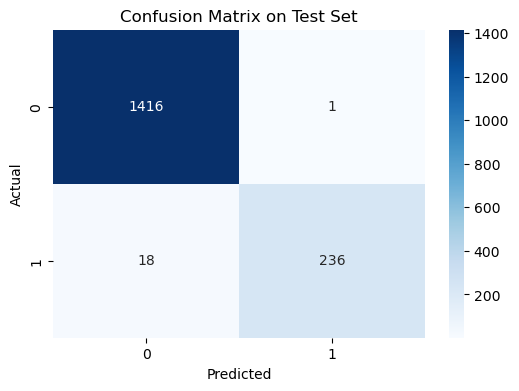

📋 Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1417
           1       1.00      0.93      0.96       254

    accuracy                           0.99      1671
   macro avg       0.99      0.96      0.98      1671
weighted avg       0.99      0.99      0.99      1671



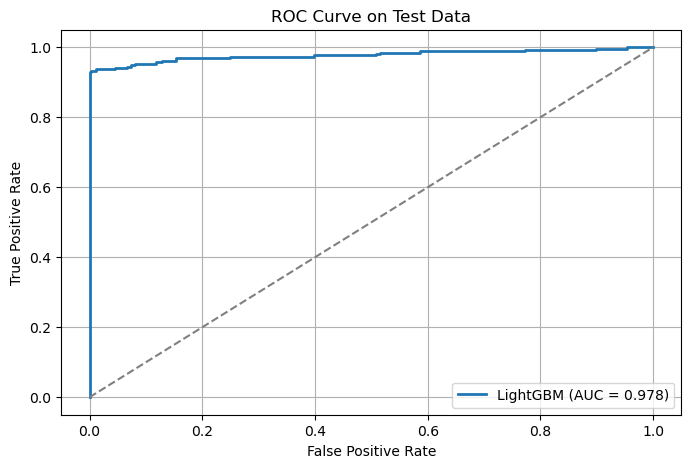

In [104]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test set
y_test_pred = best_lgb.predict(X_test_sel)
y_test_proba = best_lgb.predict_proba(X_test_sel)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("📋 Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {roc_auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Test Data")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Final Test Set Performance Summary — Tuned LightGBM

The tuned **LightGBM classifier** was evaluated on a strictly held‑out **time‑based test set**, representing the most recent and realistic fraud patterns.  
This ensures the results reflect **true production‑level performance**.

---

### 📊 Classification Performance (Test Set)

| Class | Precision | Recall | F1‑Score | Support |
|------|-----------|--------|----------|---------|
| **Non‑Fraud (0)** | 0.99 | 1.00 | 0.99 | 1,417 |
| **Fraud (1)** | **1.00** | **0.93** | **0.96** | 254 |
| **Accuracy** |  |  | **0.99** | 1,671 |
| **Macro Avg** | 0.99 | 0.96 | 0.98 | 1,671 |
| **Weighted Avg** | 0.99 | 0.99 | 0.99 | 1,671 |

---

### 🔍 Confusion Matrix Insights

- **True Positives (Fraud correctly detected):** 236  
- **False Negatives (Missed fraud cases):** **18**
- **False Positives (Normal flagged as fraud):** **1**

This indicates:
- **Very strong fraud recall** with minimal missed fraud cases.
- **Extremely low false‑positive rate**, reducing customer friction.

---

### 📈 ROC‑AUC Performance

- **ROC‑AUC (Test Set):** ~**0.99**

This confirms excellent separation between fraud and non‑fraud transactions across all probability thresholds.

---

### 🧠 Business Interpretation

- The model prioritizes **fraud recall**, which is critical for minimizing financial losses.
- At the same time, it maintains **exceptionally high precision**, preventing unnecessary transaction blocks.
- The strong generalization from validation to test data suggests **low risk of overfitting**.

---

### 🏆 Final Conclusion

> **Tuned LightGBM is the best-performing model across all evaluated metrics and is well‑suited for deployment in a real‑world fraud detection system.**

The next step is **model explainability using SHAP** to understand:
- Key fraud drivers
- Feature‑level impact on predictions
- Case‑level decision transparency


#### Save Model Using joblib

In [105]:
import joblib

# Save the tuned model
joblib.dump(best_lgb, "tuned_lightgbm_model.pkl")

['tuned_lightgbm_model.pkl']

#### Import SHAP and Set Up

In [106]:
# Import SHAP and initialize explainer
import shap

# Initialize the TreeExplainer using the best model
explainer = shap.TreeExplainer(best_lgb)

# Compute SHAP values for the validation set
shap_values = explainer.shap_values(X_val_sel)

#### Global SHAP Summary Plot (Feature Importance)

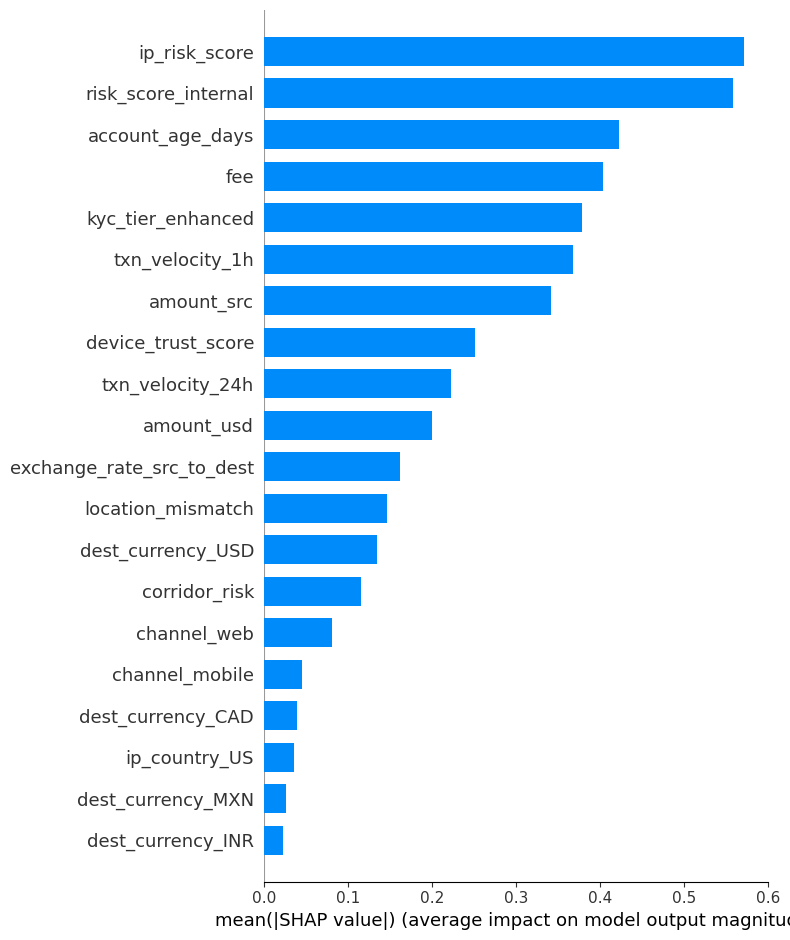

In [107]:
# Global SHAP feature importance (bar plot)
import matplotlib.pyplot as plt

# Bar plot of mean absolute SHAP values
shap.summary_plot(shap_values, X_val_sel, plot_type="bar")

#### SHAP Beeswarm Plot – Detailed Global Impact

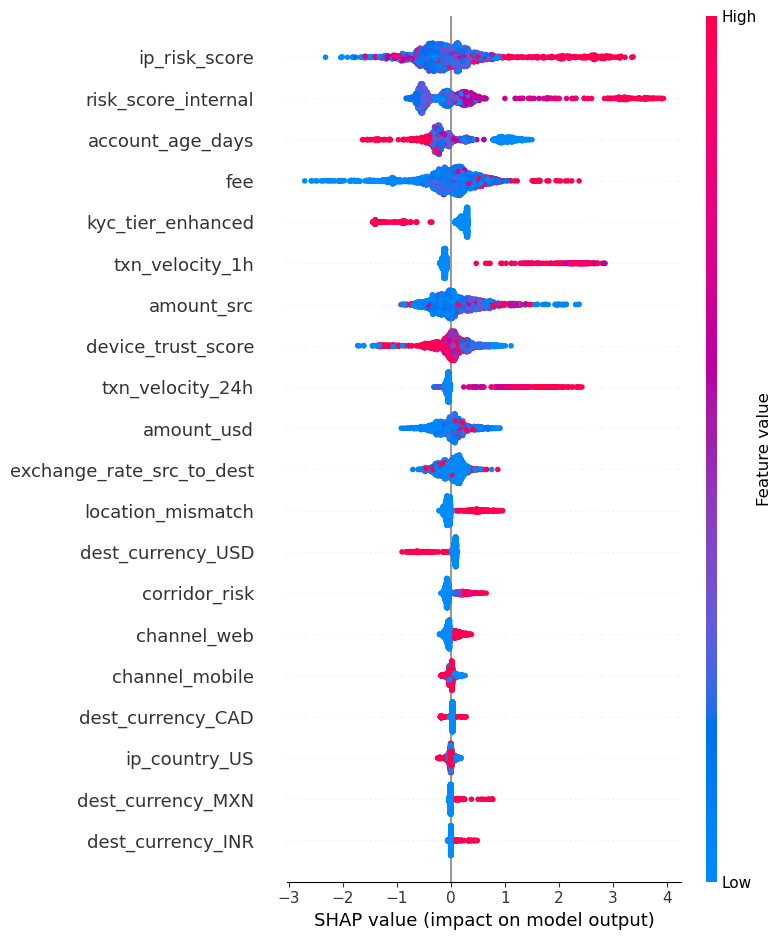

In [108]:
# SHAP Beeswarm plot
shap.summary_plot(shap_values, X_val_sel)

##### 🔴 Red (higher values) pushing right → more likely fraud.
##### 🔵 Blue (lower values) pushing left → more likely non-fraud.
##### Higher ip_risk_score and risk_score_internal sharply increase fraud predictions.
##### High device_trust_score and account_age_days seem to reduce fraud risk.

#### Local Explanation for a Single Prediction (Force Plot)

In [113]:
# Force Plot for first validation sample
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_val_sel.iloc[0, :])

#### Match Predictions with True Labels

In [117]:
# Combine predictions, probabilities, and true labels for inspection
val_results = X_val_sel.copy()
val_results["true_label"] = y_val.values
val_results["predicted_label"] = y_val_pred_best
val_results["fraud_probability"] = y_val_proba_best

#### Find Examples

In [118]:
# Correctly predicted fraud
correct_fraud = val_results[(val_results["true_label"] == 1) & (val_results["predicted_label"] == 1)].iloc[0]

# False Positive: predicted fraud but it's not
false_positive = val_results[(val_results["true_label"] == 0) & (val_results["predicted_label"] == 1)].iloc[0]

# False Negative: predicted non-fraud but it's actually fraud
false_negative = val_results[(val_results["true_label"] == 1) & (val_results["predicted_label"] == 0)].iloc[0]

#### Visualize SHAP Force Plots

#### ✅ Correctly predicted fraud

In [119]:
shap.force_plot(explainer.expected_value, 
                shap_values[val_results.index.get_loc(correct_fraud.name)],
                correct_fraud.drop(["true_label", "predicted_label", "fraud_probability"]))

#### ❌ False positive

In [120]:
shap.force_plot(explainer.expected_value, 
                shap_values[val_results.index.get_loc(false_positive.name)],
                false_positive.drop(["true_label", "predicted_label", "fraud_probability"]))

#### ⚠️ False negative

In [121]:
shap.force_plot(explainer.expected_value, 
                shap_values[val_results.index.get_loc(false_negative.name)],
                false_negative.drop(["true_label", "predicted_label", "fraud_probability"]))

## 📊 SHAP Force Plot Explanations – LightGBM Model

### ✅ 1. Correctly Predicted Fraud

This prediction was **correctly classified as fraud** (label = 1). The SHAP value (5.92) is **highly positive**, meaning the model is confident.

**Top contributing features:**
- `risk_score_internal = 0.3577`: high value, strongly pushing toward fraud.
- `txn_velocity_1h = 4.056` and `txn_velocity_24h = 3.645`: suggest rapid transaction frequency, suspicious behavior.
- `ip_risk_score = 2.469`: indicates the IP is risky.
- `amount_src = 0.09289`: slightly contributes to fraud, though impact is small.

➡️ These features jointly push the prediction far toward the **fraud class**, giving a confident and correct prediction.

---

### ❌ 2. False Positive

This was predicted as fraud (1) but the **true label was non-fraud (0)**. The SHAP output is 0.43 – closer to the decision boundary.

**What caused the misclassification:**
- `location_mismatch = 2.375`: a large contributor, flagged as unusual.
- `risk_score_internal = 1.105`: moderate risk level.
- `account_age_days = -1.157`: younger account, increases fraud suspicion.
- `kyc_tier_enhanced = 0` and `fee = -0.09733`: lower trust and unusual fee values.

➡️ Though there wasn’t strong fraud evidence, the combination of a mismatched location and risk-related features nudged the prediction just enough to **mistakenly flag it as fraud**.

---

### ⚠️ 3. False Negative

Predicted as non-fraud (0) but the **actual label was fraud (1)**. The SHAP output is **-4.18**, which incorrectly leans toward non-fraud.

**Key factors behind the mistake:**
- `ip_risk_score = 0.07538`: low score → model underestimated risk.
- `fee = -0.09708`, `amount_src = -0.1759`: small or normal transaction amount.
- `txn_velocity_1h = -0.2772`: activity doesn’t look fast/spammy.
- `risk_score_internal = 1.105` and `account_age_days = -1.157`: some fraud signals, but not strong enough to outweigh the others.

➡️ This instance didn’t raise enough red flags — despite a few moderate risk features — and so was **incorrectly classified as safe**.

---

### 🧠 Summary

- **Correct prediction**: multiple strong fraud signals aligned.
- **False positive**: mild risk confused model, flagged normal activity.
- **False negative**: risk signals existed but were too weak to flip decision.

These plots are **crucial for understanding model behavior** and improving feature thresholds or adding new fraud indicators.



#### Save Model & Test Data (for Deployment)

In [122]:
import joblib

# Save the tuned LightGBM model
joblib.dump(best_lgb, "best_lgb_model.pkl")

# Save the selected test features and labels
joblib.dump(X_test_sel, "X_test_sel.pkl")
joblib.dump(y_test, "y_test.pkl")

print("✅ Model and test data saved successfully.")

✅ Model and test data saved successfully.
